# Exercise

The folder '3-data-analysis/data/names' contains files with the names registered in the US from  1880 to 2021. Use Pandas to:

Join the data in the files in a single dataframe (e.g., a name by row)

In [1]:
import pandas as pd

df_names = pd.DataFrame(columns=['name', 'gender']).set_index(['name', 'gender'])

for year in range(1880, 2022):
    df_temp = pd.read_csv(f'./data/names/yob{year}.txt', header=None, names=['name', 'gender', year]).set_index(['name', 'gender'])
    df_names = pd.merge(df_names, df_temp, left_index=True, right_index=True, how='outer')

df_names.fillna(0, inplace=True)
df_names

,,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
name,gender,,,,,,,,,,,,,,,,,,,,,
Aaban,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,14.0,16.0,15.0,9.0,11.0,7.0,6.0,0.0,0.0
Aabha,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,9.0,7.0,7.0,0.0,0.0,6.0,5.0,5.0
Aabid,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,6.0,0.0,0.0,0.0
Aabidah,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
Aabir,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zyvion,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zyvon,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
Zyyanna,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Find the name most registered since 1880

In [2]:
name = df_names.sum(axis=1).idxmax()
number_of_registrations = df_names.sum(axis=1).max()

print(f'The name {name} was registered {number_of_registrations} times since 1880')

The name ('James', 'M') was registered 5202714.0 times since 1880


The name less registered since 1880

In [3]:
name = df_names.sum(axis=1).idxmin()
number_of_registrations = df_names.sum(axis=1).min()

print(f'The name {name} was registered {number_of_registrations} times since 1880')

The name ('Aabidah', 'F') was registered 5.0 times since 1880


Find the name most registered by year

In [4]:
df_names.idxmax(axis=0)

1880    (John, M)
1881    (John, M)
1882    (John, M)
1883    (John, M)
1884    (John, M)
          ...    
2017    (Emma, F)
2018    (Liam, M)
2019    (Liam, M)
2020    (Liam, M)
2021    (Liam, M)
Length: 142, dtype: object

Find the name most registered in the year 2000

In [5]:
name_most_registerd = df_names[2000].idxmax(axis=0)
number_of_registrations = df_names.loc[name_most_registerd, 2000]

print(f'The name {name_most_registerd} was registered {number_of_registrations} times in the year 2000')

The name ('Jacob', 'M') was registered 34489.0 times in the year 2000


Find the name less registered in the year 2000

In [6]:
# idxmin Return index of first occurrence of minimum over requested axis.
df_names.idxmin(axis=0)[2000]

('Aaban', 'M')

Find the name most registered since 1880 by gender

In [7]:
df_names.sum(axis=1).groupby('gender').idxmax()

gender
F     (Mary, F)
M    (James, M)
dtype: object

Plot the evolution of the registration of the name `Mary'

<Axes: >

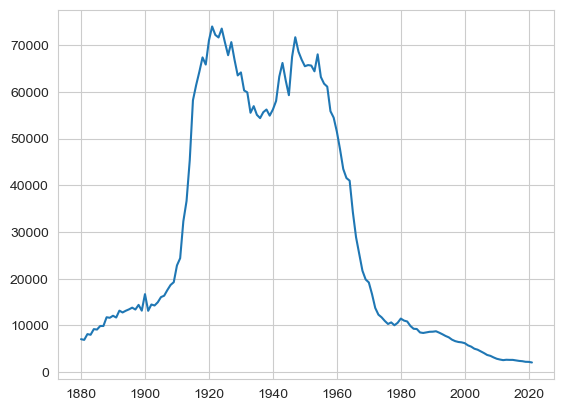

In [8]:
df_names.loc[('Mary', 'F')].plot()

Plot the evolution of the registration of the 10 most registered names

<Axes: >

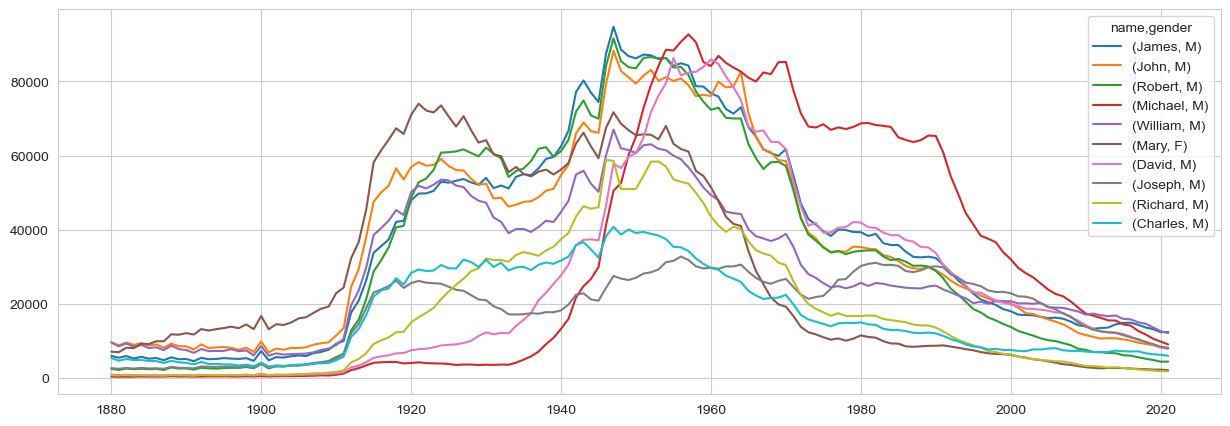

In [9]:
idx_top_10 = df_names.sum(axis=1).sort_values(ascending=False).head(10).index

df_names.loc[idx_top_10].T.plot(figsize=(15, 5))

<Axes: >

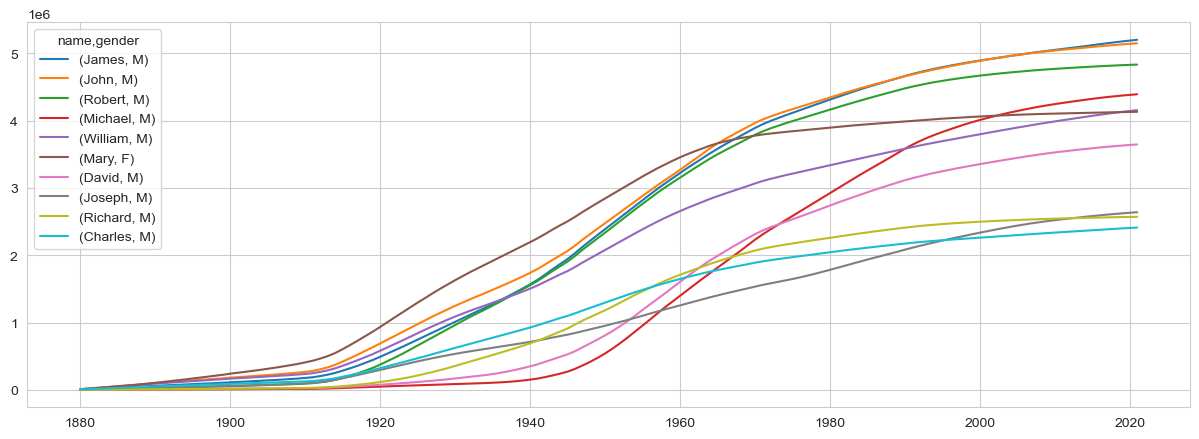

In [10]:
#if you want to plot the cumulative sum of the top 10 names
df_names.loc[idx_top_10].cumsum(axis=1).T.plot(figsize=(15, 5))

# Exercise

The folder '4-data-analysis/data/namesbystate' contains files with "State-specific data on the relative frequency of given names in the population of U.S. births where the individual has a Social Security Number"

Load the data into a single dataframe: what is the best structure?

In [11]:
import glob

def process_state_file(filename):
    df_temp = pd.read_csv(filename, header=None, names=['state', 'gender', 'year', 'name', 'count']) \
        .set_index(['state', 'name', 'gender'])

    df_state = pd.DataFrame(columns=['state', 'name','gender'])\
        .set_index(['state', 'name','gender'])

    for year in df_temp.year.unique():
        mask = df_temp.year == year
        df_state = pd.merge(
            df_state,
            df_temp.loc[mask, 'count'].rename(year),
            left_index=True, right_index=True,
            how='outer')
    return df_state


df_names = pd.DataFrame(columns=['name', 'gender', 'state']).set_index(['state', 'name', 'gender'])

for file in glob.glob('./data/namesbystate/*.TXT'):
    print(file)
    df_state = process_state_file(file)
    df_names = pd.concat([df_names, df_state])

df_names.fillna(0, inplace=True)

# df_n To get a de-fragmented frame use df_names.copy()
df_names = df_names.copy()
df_names

./data/namesbystate/IN.TXT
./data/namesbystate/IL.TXT
./data/namesbystate/KS.TXT
./data/namesbystate/SC.TXT
./data/namesbystate/HI.TXT
./data/namesbystate/GA.TXT
./data/namesbystate/SD.TXT
./data/namesbystate/CO.TXT
./data/namesbystate/NH.TXT
./data/namesbystate/MS.TXT
./data/namesbystate/MD.TXT
./data/namesbystate/UT.TXT
./data/namesbystate/LA.TXT
./data/namesbystate/ME.TXT
./data/namesbystate/WI.TXT
./data/namesbystate/NJ.TXT
./data/namesbystate/AR.TXT
./data/namesbystate/NY.TXT
./data/namesbystate/MT.TXT
./data/namesbystate/OK.TXT
./data/namesbystate/MA.TXT
./data/namesbystate/NM.TXT
./data/namesbystate/WY.TXT
./data/namesbystate/OH.TXT
./data/namesbystate/OR.TXT
./data/namesbystate/NV.TXT
./data/namesbystate/TX.TXT
./data/namesbystate/TN.TXT
./data/namesbystate/AZ.TXT
./data/namesbystate/MN.TXT
./data/namesbystate/WA.TXT
./data/namesbystate/WV.TXT
./data/namesbystate/NC.TXT
./data/namesbystate/MO.TXT
./data/namesbystate/AL.TXT
./data/namesbystate/VA.TXT
./data/namesbystate/CA.TXT
.

1910  1911  1912  1913  1914  1915  1916  1917  1918   
state name    gender                                                         
IN    Aaden   M        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  \
      Aadyn   M        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      Aaliyah F        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      Aamir   M        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      Aaniyah F        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...                    ...   ...   ...   ...   ...   ...   ...   ...   ...   
DE    Zoe     F        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      Zoey    F        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      Zora    F        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      Zuri    F        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      Zyaire  M        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                      1919  ...   2012   2013  2014   2015  2016  2017  2018   
state name    gender        ...                                                
IN    Aaden   M        0.0  ...    0.0    0.0   0.0    0.0   0.0   0.0   0.0  \
      Aadyn   M        0.0  ...    0.0    0.0   0.0    0.0   0.0   0.0   0.0   
      Aaliyah F        0.0  ...  110.0  123.0  86.0  103.0  70.0  78.0  63.0   
      Aamir   M        0.0  ...    0.0    5.0   0.0    0.0   0.0   0.0   0.0   
      Aaniyah F        0.0  ...    0.0    0.0   0.0    0.0   0.0   0.0   0.0   
...                    ...  ...    ...    ...   ...    ...   ...   ...   ...   
DE    Zoe     F        0.0  ...   17.0   20.0  23.0   16.0  13.0  15.0  18.0   
      Zoey    F        0.0  ...   28.0   15.0  21.0   28.0  18.0  14.0  15.0   
      Zora    F        0.0  ...    0.0    0.0   0.0    0.0   0.0   0.0   0.0   
      Zuri    F        0.0  ...    0.0    0.0   0.0    6.0   0.0   6.0   6.0   
      Zyaire  M        0.0  ...    0.0    0.0   0.0    5.0   0.0   0.0   0.0   

                      2019  2020  2021  
state name    gender                    
IN    Aaden   M        0.0   0.0   0.0  
      Aadyn   M        0.0   0.0   0.0  
      Aaliyah F       60.0  59.0  57.0  
      Aamir   M        0.0   0.0   0.0  
      Aaniyah F        0.0   0.0   0.0  
...                    ...   ...   ...  
DE    Zoe     F       15.0  15.0  15.0  
      Zoey    F       19.0  14.0  12.0  
      Zora    F        0.0   0.0   5.0  
      Zuri    F        0.0   7.0  16.0  
      Zyaire  M        0.0   0.0   0.0  

[333364 rows x 112 columns]

Get the registration of females for NY

In [12]:
df_names.reset_index(inplace=True)

In [13]:
mask = (df_names.state == 'NY') & (df_names.gender == 'F')
df_names[mask]

,state,name,gender,1910,1911,1912,1913,1914,1915,1916,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
104032,NY,Aadhya,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,7.0,6.0,7.0,5.0,5.0,5.0
104035,NY,Aadya,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,0.0,0.0,0.0,9.0,7.0,0.0
104037,NY,Aahana,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,6.0,0.0
104040,NY,Aaima,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
104041,NY,Aaira,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,5.0,0.0,5.0,10.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120133,NY,Zyanna,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120134,NY,Zyasia,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120138,NY,Zyla,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,6.0,7.0,11.0,15.0
120139,NY,Zylah,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0


    How many females where registered in NY since the begining of the records?

In [14]:
df_names[mask].select_dtypes('number').sum(axis=1).sum()

12189627.0

Get the registration of females named Olivia for NY

In [15]:
mask = (df_names.state == 'NY') & (df_names.gender == 'F') & (df_names.name == 'Olivia')
df_names[mask]

,state,name,gender,1910,1911,1912,1913,1914,1915,1916,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
115699,NY,Olivia,F,5.0,0.0,5.0,0.0,9.0,5.0,12.0,...,1141.0,1263.0,1255.0,1298.0,1220.0,1230.0,1092.0,1064.0,1012.0,993.0


What was the minimum, maximum, average and 10th percentile of registrations of the name Olivia in NY?

In [16]:
df_olivia = df_names[mask]
min_registration = df_olivia.select_dtypes('number').min(axis=1).values[0]
max_registration = df_olivia.select_dtypes('number').max(axis=1).values[0]
avg_registration = df_olivia.select_dtypes('number').mean(axis=1).values[0]
p10_registration = df_olivia.select_dtypes('number').quantile(0.1, axis=1).values[0]

print(f'Min: {min_registration}, Max: {max_registration}, Avg: {avg_registration}, P10: {p10_registration}')

Min: 0.0, Max: 1298.0, Avg: 289.3125, P10: 9.0


Find how many times "Olivia" was registered in NY in 2000

In [17]:
mask = (df_names.state == 'NY') & (df_names.gender == 'F') & (df_names.name == 'Olivia')
df_names[mask][2000]

115699    839.0
Name: 2000, dtype: float64

Find the year and state where Olivia was most times registered in a single year.

In [18]:
mask = (df_names.gender == 'F') & (df_names.name == 'Olivia')
df_olivia = df_names[mask].set_index(['state', 'name', 'gender'])
df_olivia

,,,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
state,name,gender,,,,,,,,,,,,,,,,,,,,,
IN,Olivia,F,0.0,6.0,9.0,0.0,5.0,0.0,8.0,7.0,10.0,5.0,...,416.0,399.0,408.0,413.0,394.0,395.0,341.0,355.0,328.0,275.0
IL,Olivia,F,0.0,5.0,0.0,10.0,7.0,12.0,9.0,7.0,0.0,12.0,...,820.0,889.0,905.0,816.0,770.0,727.0,718.0,725.0,639.0,697.0
KS,Olivia,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,179.0,186.0,214.0,199.0,184.0,183.0,191.0,178.0,189.0,187.0
SC,Olivia,F,8.0,8.0,9.0,11.0,13.0,6.0,18.0,21.0,16.0,13.0,...,233.0,223.0,228.0,238.0,228.0,222.0,232.0,269.0,231.0,238.0
HI,Olivia,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,46.0,65.0,43.0,62.0,57.0,65.0,50.0,48.0,59.0,52.0
GA,Olivia,F,14.0,10.0,15.0,11.0,20.0,16.0,20.0,24.0,23.0,24.0,...,491.0,553.0,599.0,564.0,544.0,572.0,522.0,526.0,548.0,521.0
SD,Olivia,F,0.0,5.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,6.0,...,49.0,54.0,57.0,51.0,48.0,50.0,48.0,42.0,36.0,36.0
CO,Olivia,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,317.0,318.0,344.0,348.0,329.0,273.0,326.0,296.0,322.0,321.0
NH,Olivia,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,91.0,84.0,85.0,91.0,65.0,67.0,88.0,74.0,65.0,91.0


In [19]:
max_registration = df_olivia.max().max()
max_registration

2608.0

In [20]:
df_olivia[df_olivia == max_registration].stack()

state  name    gender      
CA     Olivia  F       2019    2608.0
dtype: float64

<span style="color:red">  Find the year where Olivia was most times registred (all states) </span>

Find the states where the name Mary and John were most times registered

In [21]:
mask = df_names.name.isin(['Mary', 'John'])
df_john_mary = df_names[mask].copy()
df_john_mary

,state,name,gender,1910,1911,1912,1913,1914,1915,1916,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
3608,IN,John,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3609,IN,John,M,156.0,222.0,473.0,605.0,824.0,1088.0,1189.0,...,191.0,184.0,210.0,221.0,176.0,190.0,151.0,168.0,136.0,145.0
5216,IN,Mary,F,619.0,612.0,935.0,1104.0,1349.0,1977.0,2223.0,...,63.0,59.0,72.0,61.0,69.0,73.0,57.0,48.0,50.0,61.0
5217,IN,Mary,M,0.0,5.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13241,IL,John,F,0.0,0.0,0.0,6.0,5.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330503,RI,John,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
330504,RI,John,M,66.0,110.0,172.0,201.0,284.0,326.0,313.0,...,36.0,41.0,42.0,40.0,53.0,28.0,45.0,27.0,29.0,38.0
330899,RI,Mary,F,141.0,168.0,266.0,269.0,350.0,415.0,414.0,...,0.0,8.0,6.0,6.0,8.0,0.0,8.0,6.0,0.0,0.0
332411,DE,John,M,21.0,25.0,79.0,74.0,89.0,118.0,134.0,...,47.0,46.0,37.0,32.0,36.0,28.0,42.0,34.0,28.0,23.0


In [22]:
df_john_mary['total'] = df_john_mary.select_dtypes('number').sum(axis=1)

In [23]:
df_john_mary[['state', 'name', 'gender', 'total']].groupby(['name', 'gender']).max()

state     total
name gender                
John F         WV    1809.0
     M         WY  497396.0
Mary F         WY  292357.0
     M         WV     969.0

Plot the evolution of the names Mary and John through the years

In [24]:
df_john_mary.drop('total', inplace=True, axis=1)

<Axes: >

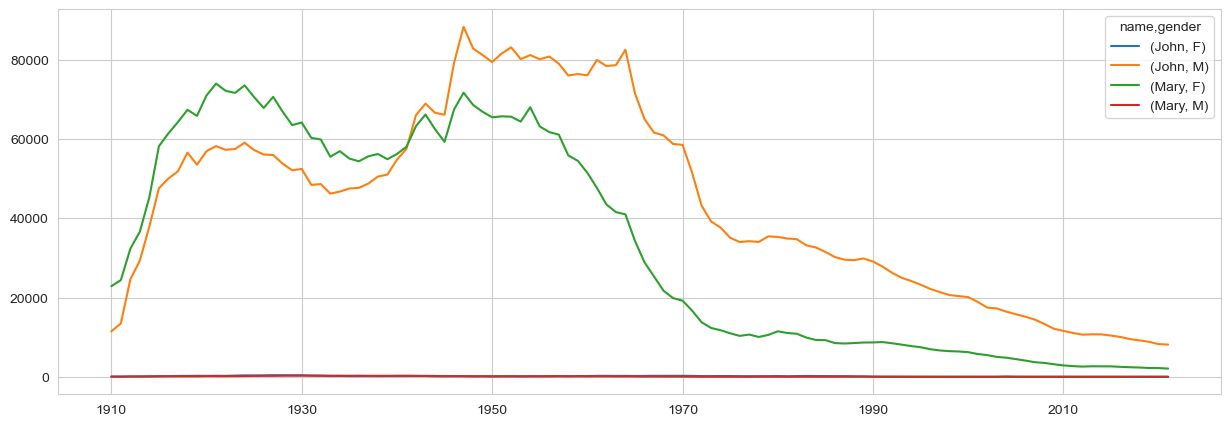

In [25]:
df_john_mary.drop('state', axis=1).groupby(['name', 'gender']).sum().T.plot(figsize=(15, 5))

Find the name most registered in a state for a single year

In [26]:
max_registration = df_names.select_dtypes('number').max().max()
max_registration

10026.0

In [27]:
res = df_names[df_names == max_registration].stack().reset_index().values
res

array([[116619, 1947, 10026.0]], dtype=object)

In [28]:
idx, year, value = res[0]

In [29]:
df_names.loc[idx, ['state', 'name', year]]

state         NY
name      Robert
1947     10026.0
Name: 116619, dtype: object

Plot the evolution of the top 5 (comulattive, i.e., all times) female names

In [30]:
mask = df_names.gender == 'F'
top5_names = df_names[mask].drop(['gender', 'state'], axis=1).groupby('name').sum().sum(axis=1).sort_values(ascending=False).head(5)
top5_names

name
Mary         3747982.0
Patricia     1569661.0
Elizabeth    1560365.0
Jennifer     1468240.0
Linda        1448868.0
dtype: float64

<Axes: >

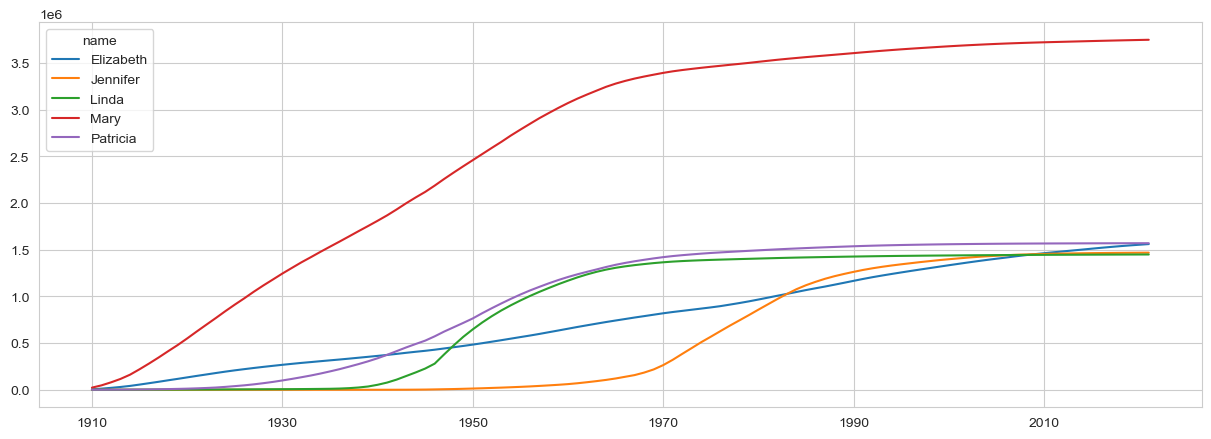

In [31]:
female_mask = (df_names.name.isin(top5_names.index)) & (df_names.gender == 'F')
df_names[female_mask].drop(['gender', 'state'], axis=1).groupby('name').sum().cumsum(axis=1).T.plot(figsize=(15, 5))